# Anti Money Laundering (AML) - XGBoost Evaluation


*   Data Preprocessing- LI Small Transaction in IBM



In [ ]:
#import libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#dataset for LI small transaction
df = pd.read_csv('LI-Small_Trans.csv')

In [ ]:
# import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
#rename the target label
df = df.rename(columns={'Is Laundering': 'Is_Laundering'})

In [ ]:
#Select columns of object type
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols

['Timestamp',
 'Account',
 'Account.1',
 'Receiving Currency',
 'Payment Currency',
 'Payment Format']

In [ ]:
# Use Label Encoding to quantify object type columns
label_encoder = LabelEncoder()
for col in object_cols:
    if col != 'Payment Format':
        df[col] = label_encoder.fit_transform(df[col])

# Sort by payment complexity
payment_map = {'Cash': 1, 'Cheque': 2, 'ACH': 3, 'Credit Card': 4, 'Wire': 5, 'Bitcoin': 6, 'Reinvestment': 7}

# Use map method to encode Payment Format column
df['Payment Format'] = df['Payment Format'].map(payment_map)

df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is_Laundering
0,8,11,50,11,30,3195403.00,5,3195403.00,5,7.0,0.0
1,21,3402,815,3402,678,1858.96,5,1858.96,5,7.0,0.0
2,0,11,50,1120,2622,592571.00,5,592571.00,5,2.0,0.0
3,16,3814,3017,3814,2623,12.32,5,12.32,5,7.0,0.0
4,0,20,3020,20,2626,2941.56,5,2941.56,5,7.0,0.0


In [ ]:
# Separate labels from the dataset
labels = df['Is_Laundering']
df = df.drop('Is_Laundering', axis=1)

# Convert Timestamp column to timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype(int) / 10**9

#Normalize the data set
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df)
df_normalized = scaler.transform(df)

# Convert the normalized data into a DataFrame object and set the column names
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)


# Add the label column to the regression-normalized data set
df_normalized['Is_Laundering'] = labels.tolist()

# Output the normalized data
print(df_normalized.head())


   Timestamp  From Bank   Account   To Bank  Account.1  Amount Received  \
0  -0.448276  -0.999933 -0.997887 -0.999933  -0.998717        -0.998518   
1   0.448276  -0.979204 -0.965566 -0.979203  -0.971015        -0.999999   
2  -1.000000  -0.999933 -0.997887 -0.993153  -0.887908        -0.999725   
3   0.103448  -0.976686 -0.872531 -0.976685  -0.887865        -1.000000   
4  -1.000000  -0.999878 -0.872404 -0.999878  -0.887737        -0.999999   

   Receiving Currency  Amount Paid  Payment Currency  Payment Format  \
0            0.428571    -0.998881              0.25        1.000000   
1            0.428571    -0.999999              0.25        1.000000   
2            0.428571    -0.999792              0.25       -0.666667   
3            0.428571    -1.000000              0.25        1.000000   
4            0.428571    -0.999999              0.25        1.000000   

   Is_Laundering  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [ ]:
# Select rows with Is_Laundering column as 1
df_laundering = df_normalized.loc[df_normalized['Is_Laundering'] == 1]

# Output the selected data
print(df_normalized.count())
df_laundering.count()

Timestamp             63143
From Bank             63143
Account               63143
To Bank               63143
Account.1             63143
Amount Received       63143
Receiving Currency    63143
Amount Paid           63143
Payment Currency      63143
Payment Format        63142
Is_Laundering         63142
dtype: int64


Timestamp             3
From Bank             3
Account               3
To Bank               3
Account.1             3
Amount Received       3
Receiving Currency    3
Amount Paid           3
Payment Currency      3
Payment Format        3
Is_Laundering         3
dtype: int64

In [ ]:
# Shuffle the data before creating the subsamples since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

df_normalized = df_normalized.sample(frac=1)

fraud_df = df_normalized.loc[df_normalized['Is_Laundering'] == 1]
non_fraud_df = df_normalized.loc[df_normalized['Is_Laundering'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is_Laundering
50683,-0.931034,-0.999572,-1.000000,-0.930892,0.556078,-0.999491,0.428571,-0.999615,0.25,-1.0,1.0
38272,-0.862069,-0.999572,-1.000000,-0.861472,0.180343,-0.999967,0.428571,-0.999975,0.25,-1.0,1.0
38568,-0.103448,-0.296254,0.249382,-0.296215,0.188979,-1.000000,0.428571,-1.000000,0.25,1.0,0.0
39028,0.310345,-0.999572,-1.000000,0.302059,0.203471,-0.999984,0.428571,-0.999988,0.25,-1.0,1.0
7041,-0.517241,-0.866571,-0.756385,-0.866564,-0.781929,-0.999983,0.428571,-0.999987,0.25,1.0,0.0


<ipython-input-16-400b620334c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Timestamp_fraud_dist,ax=ax, fit=norm, color='#FB8861')


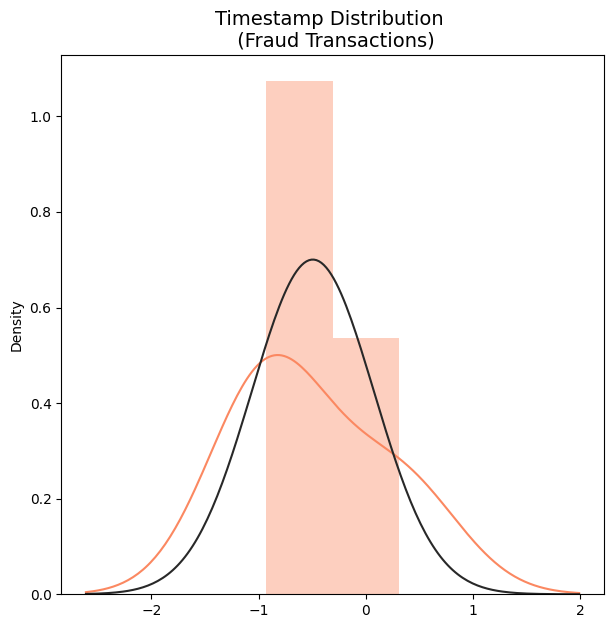

In [ ]:
from scipy.stats import norm
import seaborn as sns

f, ax = plt.subplots(figsize=(7, 7))

Timestamp_fraud_dist = new_df['Timestamp'].loc[new_df['Is_Laundering'] == 1].values
sns.distplot(Timestamp_fraud_dist,ax=ax, fit=norm, color='#FB8861')
ax.set_title('Timestamp Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
#Remove timestamp outliers:
Timestamp_fraud = new_df['Timestamp'].loc[new_df['Is_Laundering'] == 1].values
q25, q75 = np.percentile(Timestamp_fraud, 25), np.percentile(Timestamp_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Timestamp_iqr = q75 - q25
print('iqr: {}'.format(Timestamp_iqr))

Timestamp_cut_off = Timestamp_iqr * 1.5
Timestamp_lower, Timestamp_upper = q25 - Timestamp_cut_off, q75 + Timestamp_cut_off
print('Cut Off: {}'.format(Timestamp_cut_off))
print('Timestamp Lower: {}'.format(Timestamp_lower))
print('Timestamp Upper: {}'.format(Timestamp_upper))

outliers = [x for x in Timestamp_fraud if x < Timestamp_lower or x > Timestamp_upper]
print('Feature Timestamp Outliers for Fraud Cases: {}'.format(len(outliers)))
print('Timestamp outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Timestamp'] > Timestamp_upper) | (new_df['Timestamp'] < Timestamp_lower)].index)

new_df.head()

Quartile 25: -0.896551724137931 | Quartile 75: -0.27586206896551724
iqr: 0.6206896551724138
Cut Off: 0.9310344827586208
Timestamp Lower: -1.8275862068965518
Timestamp Upper: 0.6551724137931035
Feature Timestamp Outliers for Fraud Cases: 0
Timestamp outliers:[]


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is_Laundering
50683,-0.931034,-0.999572,-1.000000,-0.930892,0.556078,-0.999491,0.428571,-0.999615,0.25,-1.0,1.0
38272,-0.862069,-0.999572,-1.000000,-0.861472,0.180343,-0.999967,0.428571,-0.999975,0.25,-1.0,1.0
38568,-0.103448,-0.296254,0.249382,-0.296215,0.188979,-1.000000,0.428571,-1.000000,0.25,1.0,0.0
39028,0.310345,-0.999572,-1.000000,0.302059,0.203471,-0.999984,0.428571,-0.999988,0.25,-1.0,1.0
7041,-0.517241,-0.866571,-0.756385,-0.866564,-0.781929,-0.999983,0.428571,-0.999987,0.25,1.0,0.0




*   Evaluation -LI Small Transaction in IBM



In [ ]:
# Split the dataset into features and target variable
X = new_df.drop('Is_Laundering', axis=1)
y = new_df['Is_Laundering']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the hyperparameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'error'],
    'eta': 0.1,
    'max_depth': 16,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 1
}

# Train the XGBoost model and record the evaluation results
num_rounds = 1000
watchlist = [(dtrain, 'train'), (dtest, 'test')]
eval_results = {}
bst = xgb.train(params, dtrain, num_rounds, evals=watchlist, evals_result=eval_results)

# Evaluate the XGBoost model
y_pred = bst.predict(dtest)
y_pred = np.round(y_pred)
test_score = accuracy_score(y_test, y_pred)
print("XGBoost has a test score of", round(test_score, 2) * 100, "% accuracy score")

[0]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[1]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[2]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[3]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[4]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[5]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[6]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[7]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[8]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[9]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[10]	train-logloss:0.69315	train-error:0.50000	test-logloss:0.69315	test-error:0.50000
[11]	train-logloss:0.69315	train-error:0.50000	test-l



*   Data preprocessing - HI Small Transaction in IBM



In [1]:
# import libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#dataset for HI small transaction
df = pd.read_csv('HI-Small_Trans.csv')

In [ ]:
# import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#rename target label
df = df.rename(columns={'Is Laundering': 'Is_Laundering'})

In [ ]:
#Select columns of object type
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols

['Timestamp',
 'Account',
 'Account.1',
 'Receiving Currency',
 'Payment Currency',
 'Payment Format']

In [ ]:
# Use Label Encoding to quantify object type columns
label_encoder = LabelEncoder()
for col in object_cols:
    if col != 'Payment Format':
        df[col] = label_encoder.fit_transform(df[col])

#Sort by payment complexity
payment_map = {'Cash': 1, 'Cheque': 2, 'ACH': 3, 'Credit Card': 4, 'Wire': 5, 'Bitcoin': 6, 'Reinvestment': 7}

# Use map method to encode Payment Format column
df['Payment Format'] = df['Payment Format'].map(payment_map)

df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is_Laundering
0,20,10,332,10,255,3697.34,12,3697.34,12,7.0,0.0
1,20,3208,363,1,285,0.01,12,0.01,12,2.0,0.0
2,0,3209,364,3209,280,14675.57,12,14675.57,12,7.0,0.0
3,2,12,368,12,283,2806.97,12,2806.97,12,7.0,0.0
4,6,10,369,10,284,36682.97,12,36682.97,12,7.0,0.0


In [ ]:
#Separate label from dataset
labels = df['Is_Laundering']
df = df.drop('Is_Laundering', axis=1)

#Convert Timestampt column to timestampt
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype(int) / 10**9

#Normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df)
df_normalized = scaler.transform(df)

#Convert the normalized data into a Dataframe object and set the column names
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

#Add the label column into regression-normalized data set
df_normalized['Is_Laundering'] = labels.tolist()

#Output the normalized data
print(df_normalized.head())

   Timestamp  From Bank   Account   To Bank  Account.1  Amount Received  \
0  -0.090909  -0.999949 -0.996477 -0.999949  -0.997207        -1.000000   
1  -0.090909  -0.981994 -0.996148 -1.000000  -0.996879        -1.000000   
2  -1.000000  -0.981988 -0.996137 -0.981986  -0.996933        -1.000000   
3  -0.909091  -0.999938 -0.996095 -0.999938  -0.996900        -1.000000   
4  -0.727273  -0.999949 -0.996084 -0.999949  -0.996889        -0.999999   

   Receiving Currency  Amount Paid  Payment Currency  Payment Format  \
0            0.714286    -1.000000          0.714286        1.000000   
1            0.714286    -1.000000          0.714286       -0.666667   
2            0.714286    -1.000000          0.714286        1.000000   
3            0.714286    -1.000000          0.714286        1.000000   
4            0.714286    -0.999999          0.714286        1.000000   

   Is_Laundering  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [ ]:
# Select rows with Is_Laundering column as 1
df_laundering = df_normalized.loc[df_normalized['Is_Laundering'] == 1]

#Output selected data
print(df_normalized.count())
df_laundering.count()

Timestamp             252181
From Bank             252181
Account               252181
To Bank               252181
Account.1             252181
Amount Received       252181
Receiving Currency    252181
Amount Paid           252181
Payment Currency      252181
Payment Format        252180
Is_Laundering         252180
dtype: int64


Timestamp             26
From Bank             26
Account               26
To Bank               26
Account.1             26
Amount Received       26
Receiving Currency    26
Amount Paid           26
Payment Currency      26
Payment Format        26
Is_Laundering         26
dtype: int64

In [ ]:
# Shuffle the data before creating the subsamples since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
df_normalized = df_normalized.sample(frac=1)

fraud_df = df_normalized.loc[df_normalized['Is_Laundering'] == 1]
non_fraud_df = df_normalized.loc[df_normalized['Is_Laundering'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is_Laundering
216900,-0.590909,-0.999613,-0.999968,-0.940169,-0.464527,-0.999313,0.857143,-0.999313,0.857143,-0.666667,1.0
222757,-0.500000,-0.999972,-0.412793,-0.999607,-0.415372,-0.912286,0.000000,-0.912286,0.000000,-0.666667,0.0
66432,-0.409091,-0.992033,0.249066,-0.992032,0.225991,-1.000000,0.714286,-1.000000,0.714286,1.000000,0.0
137534,0.772727,-0.881122,-0.940681,-1.000000,-0.920057,-1.000000,0.714286,-1.000000,0.714286,-0.333333,1.0
128260,-0.681818,-0.997704,-0.856170,-0.997703,-0.867474,-0.999999,-0.428571,-0.999999,-0.428571,1.000000,0.0


<ipython-input-9-400b620334c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Timestamp_fraud_dist,ax=ax, fit=norm, color='#FB8861')


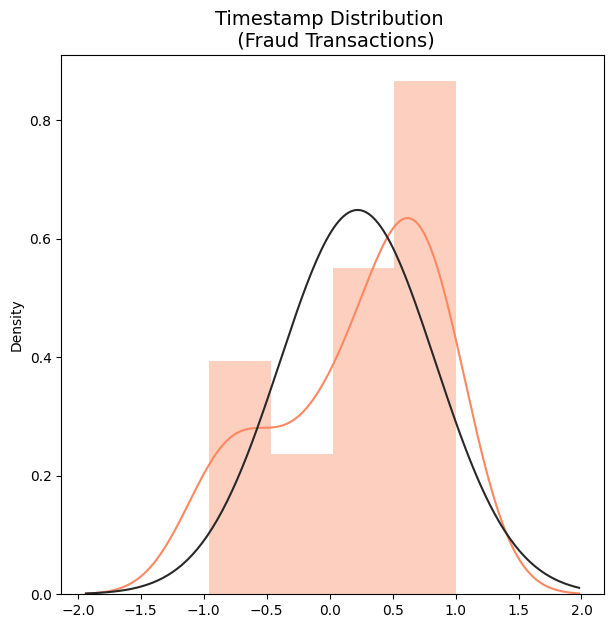

In [ ]:
from scipy.stats import norm
import seaborn as sns

f, ax = plt.subplots(figsize=(7, 7))

Timestamp_fraud_dist = new_df['Timestamp'].loc[new_df['Is_Laundering'] == 1].values
sns.distplot(Timestamp_fraud_dist,ax=ax, fit=norm, color='#FB8861')
ax.set_title('Timestamp Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
#Remove Timestamp outlier
Timestamp_fraud = new_df['Timestamp'].loc[new_df['Is_Laundering'] == 1].values
q25, q75 = np.percentile(Timestamp_fraud, 25), np.percentile(Timestamp_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Timestamp_iqr = q75 - q25
print('iqr: {}'.format(Timestamp_iqr))

Timestamp_cut_off = Timestamp_iqr * 1.5
Timestamp_lower, Timestamp_upper = q25 - Timestamp_cut_off, q75 + Timestamp_cut_off
print('Cut Off: {}'.format(Timestamp_cut_off))
print('Timestamp Lower: {}'.format(Timestamp_lower))
print('Timestamp Upper: {}'.format(Timestamp_upper))

outliers = [x for x in Timestamp_fraud if x < Timestamp_lower or x > Timestamp_upper]
print('Feature Timestamp Outliers for Fraud Cases: {}'.format(len(outliers)))
print('Timestamp outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Timestamp'] > Timestamp_upper) | (new_df['Timestamp'] < Timestamp_lower)].index)

new_df.head()

Quartile 25: -0.1818181818181817 | Quartile 75: 0.7159090909090913
iqr: 0.8977272727272729
Cut Off: 1.3465909090909094
Timestamp Lower: -1.528409090909091
Timestamp Upper: 2.062500000000001
Feature Timestamp Outliers for Fraud Cases: 0
Timestamp outliers:[]


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is_Laundering
216900,-0.590909,-0.999613,-0.999968,-0.940169,-0.464527,-0.999313,0.857143,-0.999313,0.857143,-0.666667,1.0
222757,-0.500000,-0.999972,-0.412793,-0.999607,-0.415372,-0.912286,0.000000,-0.912286,0.000000,-0.666667,0.0
66432,-0.409091,-0.992033,0.249066,-0.992032,0.225991,-1.000000,0.714286,-1.000000,0.714286,1.000000,0.0
137534,0.772727,-0.881122,-0.940681,-1.000000,-0.920057,-1.000000,0.714286,-1.000000,0.714286,-0.333333,1.0
128260,-0.681818,-0.997704,-0.856170,-0.997703,-0.867474,-0.999999,-0.428571,-0.999999,-0.428571,1.000000,0.0




*   Evaluation -HI Small Transaction in IBM



In [ ]:
# Split the dataset into features and target variable
X = new_df.drop('Is_Laundering', axis=1)
y = new_df['Is_Laundering']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the hyperparameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'error'],
    'eta': 0.1,
    'max_depth': 16,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 1
}

# Train the XGBoost model and record the evaluation results
num_rounds = 1000
watchlist = [(dtrain, 'train'), (dtest, 'test')]
eval_results = {}
bst = xgb.train(params, dtrain, num_rounds, evals=watchlist, evals_result=eval_results)

# Evaluate the XGBoost model
y_pred = bst.predict(dtest)
y_pred = np.round(y_pred)
test_score = accuracy_score(y_test, y_pred)
print("XGBoost has a test score of", round(test_score, 2) * 100, "% accuracy score")

[0]	train-logloss:0.62465	train-error:0.43902	test-logloss:0.67166	test-error:0.72727
[1]	train-logloss:0.57462	train-error:0.07317	test-logloss:0.60550	test-error:0.00000
[2]	train-logloss:0.53348	train-error:0.07317	test-logloss:0.55435	test-error:0.00000
[3]	train-logloss:0.49624	train-error:0.07317	test-logloss:0.50856	test-error:0.00000
[4]	train-logloss:0.46485	train-error:0.07317	test-logloss:0.46320	test-error:0.00000
[5]	train-logloss:0.43542	train-error:0.07317	test-logloss:0.42160	test-error:0.00000
[6]	train-logloss:0.41018	train-error:0.07317	test-logloss:0.39222	test-error:0.00000
[7]	train-logloss:0.39159	train-error:0.07317	test-logloss:0.36001	test-error:0.00000
[8]	train-logloss:0.36999	train-error:0.07317	test-logloss:0.33171	test-error:0.00000
[9]	train-logloss:0.35339	train-error:0.07317	test-logloss:0.30918	test-error:0.00000
[10]	train-logloss:0.33920	train-error:0.07317	test-logloss:0.29086	test-error:0.00000
[11]	train-logloss:0.32636	train-error:0.07317	test-l